# ### Advanced Machine Learning

# Unsupervised Learning - Clustering and Mixture Models


# HW #3: Unsupervised ML 


In [4]:
student1Name="Matan Mizrachi" # student1 name here
student1ID="207299363" # student1 ID here


student2Name="Ron Yosef" # student2 name here
student2ID="318466711" # student2 ID here

## MNIST dataset

We saw this dataset in a previous class exercise. The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. 

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) describes a variety of different classification results on MNIST (Note, the tests on this website are for a larger and higher resolution dataset than we'll use.) To see a comparison of classification methods implemented in scikit-learn on the MNIST dataset, see 
[this page](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
The MNIST dataset is also a frequently used for benchmarking clustering algorithms and because it has labels, we can evaluate the homogeneity or purity of the clusters. 

There are several versions of the dataset. We'll use the one that is built-in to scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10  
* Samples per class: $\approx$180
* Samples total: 1797
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import pandas as pd

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
# from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
cmap = ListedColormap(["Red","Green","Blue"])
# cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


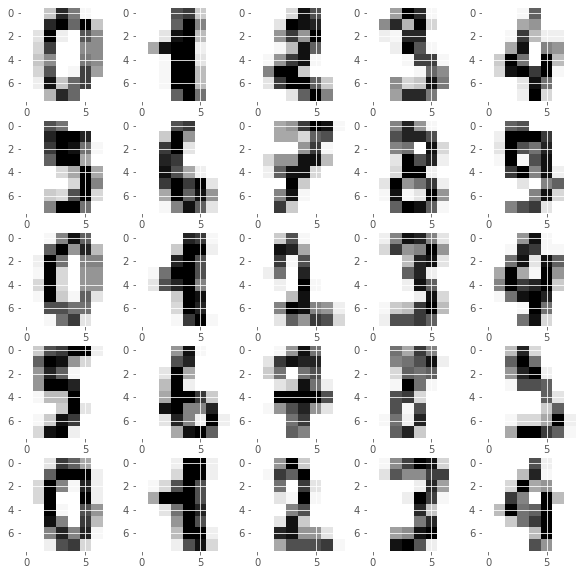

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

## MNIST: visualization
**1:** Use PCA and T-SNE methods to project a 2D visualization of the dataset 

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import cm

In [11]:
%%time
pca = PCA(n_components=10).fit_transform(X)
tnse = TSNE(n_components=10, method='exact').fit_transform(X)

Wall time: 5min 29s


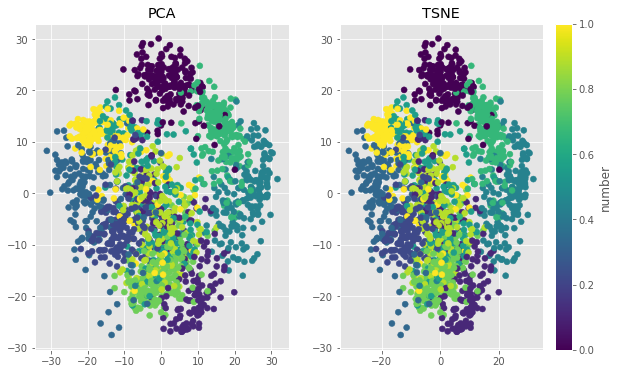

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(pca[:, 0], pca[:, 1], c=cm.get_cmap('viridis', 10)(y), vmin=0, vmax=10)
plt.title('PCA')
plt.subplot(1, 2, 2)
fig = plt.scatter(pca[:, 0], pca[:, 1], c=cm.get_cmap('viridis', 10)(y), vmin=0, vmax=10)
plt.colorbar(fig, label='number')
plt.title('TSNE')
plt.show()

## MNIST:  clustering
**1:** Use k-means method to cluster the dataset and compute the homogeneity score for the clustering. 

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
kmeans = KMeans(n_clusters=10)

y_pred = kmeans.fit_predict(X)
homogeneity_score(y, y_pred)

0.7404551551027658


**2:** Use a hierarchical clustering method to cluster the dataset. Again compute the homogeneity. Did it change?


In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=10)
y_pred = hc.fit_predict(X)
homogeneity_score(y, y_pred)

0.8575128719504723

Yes, the results have changed and are better than the results of the **KMeans** algorithm.

**3.** Use DBScan to cluster the dataset. A problem you will face is choosing $\epsilon$. You can use the DistanceMetric function to get a sense of typical distances between points.  Again compute the homogeneity.

In [35]:
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.model_selection import ParameterGrid

params = {'eps': np.logspace(-6, 6, 15), 'metric': ['euclidean', 'manhattan', 'chebyshev']}
params = list(ParameterGrid(params))
results = np.zeros((len(params), 3), dtype=object)
for i, p in enumerate(params):
    y_pred = DBSCAN(eps=p['eps'], metric=p['metric']).fit_predict(X)
    results[i] = [p['metric'], p['eps'], homogeneity_score(y, y_pred)]

results = pd.DataFrame(data=results, columns=['metric', 'eps', 'homogeneity'])

**4.** Use Gausian Mixture Models to cluster the dataset.  Again compute the homogeneity.

In [3]:
# your code here

**5.** Take a look at the clustering methods and options for various methods on the [scikit-learn page](http://scikit-learn.org/stable/modules/clustering.html). By modifying the following code, try to find the clustering method with the largest homogeneity score for this dataset. 

In [2]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))


method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="random", data=X)

# your code here